## <center>Analyse de Données</center>
## <center>Mini Projet SVD avec  Numpy</center>
#### <center>Ali AZZI LSD 2</center>

### 1-	Images en noir et blanc et Numpy

In [1]:
from PIL import Image 
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as alg

#### Récupérer les pixels d’une image sous forme d’un tableau Numpy 

In [2]:
im=Image.open(r"C:\Users\pc\Desktop\lena_gris.png") 
T=np.array(im)
h,l=T.shape #hauteur, largeur de l'image

#### On obtient un tableau de taille suivante

In [3]:
T.shape

(435, 395)

#### Affichier l'image d'après le tableau qu'on a construit

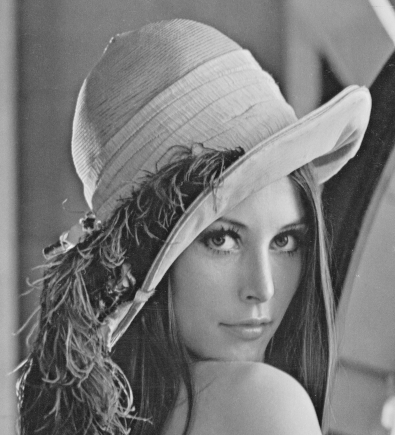

In [4]:
Image.fromarray(T)

In [5]:
#help(alg.svd)

### 2-	Compression d’une image par utilisation de la décomposition SVD

In [6]:
# Definir une fonction qui retourne :
# 1 la matrice compressé avec k valeur singuliere,
# 2 un vecteur qui contient les valeurs singuliere de la matrice de l'image
def compression(M,k):
    #Utiliser la fonction libalg.svd valable sur numpy
    U, sigma, V = np.linalg.svd(M)
    #Prendre que les premieres k valeurs singulieres 
    cprM = np.matrix(U[:, :k]) * np.diag(sigma[:k]) * np.matrix(V[:k, :])
    #Obtenir le vecteur sigma des valeurs singulieres
    d=np.diag(sigma)
    return cprM,d.diagonal()

#### Obtenir la nouvelle matrice avec les 30 premieres valeurs singuliere 
#### Calculer le taux de compression t=(k x (n+m+1))/(n x m)
#### Transformer le type de ses valeurs pour qu'elle soit transformable en image

Taux de compression pour k = 30 est : 0.1450894805761676


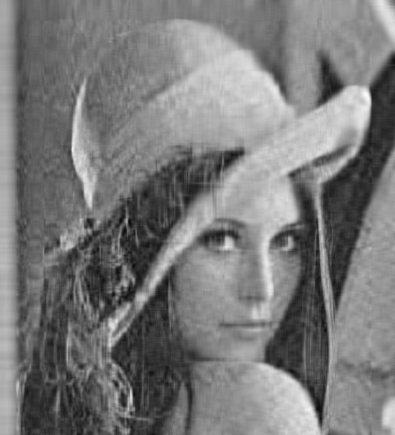

In [7]:
j=30
A,S=compression(T,j)
# Taille compressé proportionnelle à :
cprsize=j*(h+l+1)
# Taux de compression = Taille compressé sur Taille initiale
tauxcpr= cprsize/(h*l)
print('Taux de compression pour k = 30 est :',tauxcpr)
A1=A.astype('uint8')
myimage=Image.fromarray(A1)
myimage

#### Boucle permettant d'afficher les images obtenues pour chaque k avec le taux de compression

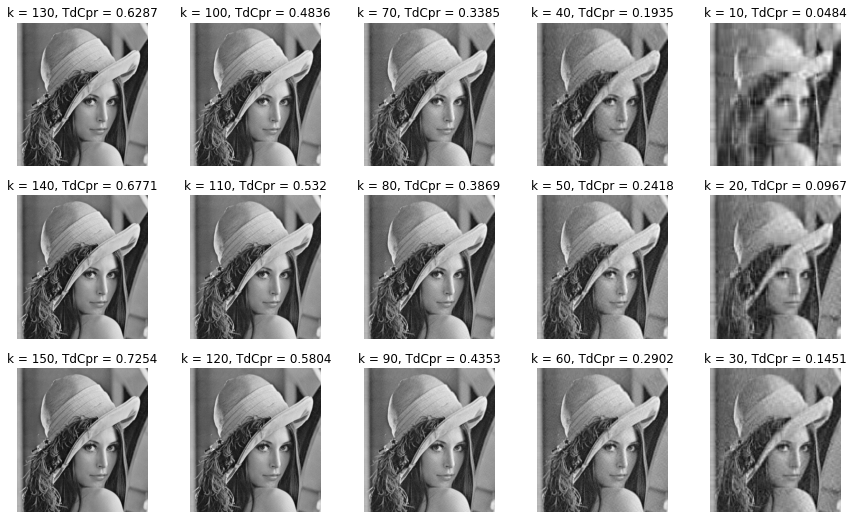

In [8]:
fig = plt.figure(figsize=(15, 9)) 
m=1
rows = 3
columns = 5
k ={10, 20, 30,40,50,60,70,80,90,100,110,120,130,140,150}
for i in k:
    A,S=compression(T,i)
    A1=A.astype('uint8')
    fig.add_subplot(rows, columns,m ) 
    m+=1
    plt.imshow(A1,cmap='gray') 
    plt.axis('off') 
    tauxcpr= i*(h+l+1)/(h*l)
    # Affichier le Taux de compression avec 4 chiffres apès virgule 
    title = 'k = {0}, TdCpr = {1}'.format(i,round(tauxcpr,4))
    plt.title(title)

#### Autre methode d'affichage

In [9]:
"""
k ={10, 20, 30,40,50,60,70,80,90,100,110,120,130,150}
for i in k:
    A,S=compression(T,i)
    plt.imshow(A,cmap='gray')
    tauxcpr= i*(h+l+1)/(h*l)
    title = 'k = {0} , taux de decompression = {1}'.format(i,tauxcpr)
    plt.title(title)
    plt.show()
"""
print('C est qu une autre methode daffichage')

C est qu une autre methode daffichage


#### Tracer le graphe donnant les valeurs singulières en fonction de k

In [10]:
# Obtenir un 2D vecteur contenant les valeurs singulieres en fct de k
P=[]
for i in k:
    A,S=compression(T,i)
    P.append(S)

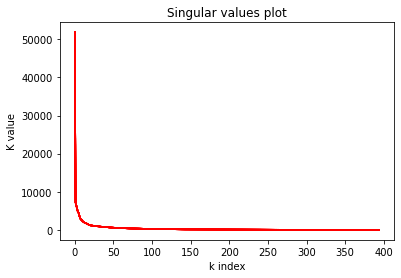

In [11]:
# Affichier les valeurs
plt.title("Singular values plot")
plt.xlabel("k index")
plt.ylabel("K value")
for i, arr in enumerate(P):
    x = np.array(range(0, len(arr)))
    plt.plot(x, arr, color ='r')
plt.show()

#### Déterminer la valeur de k permettant de capter 95% de la variance

In [12]:
for i in range(1,396):
    if ((sum(S[:i]))**2/(sum(S))**2) > 0.95: #calculer la variance
        break
        
print('Pour capter 95% de la variance on a besoin de',i,'valeurs singulieres')

Pour capter 95% de la variance on a besoin de 241 valeurs singulieres


#### Afficher la compression via SVD pour cette valeur

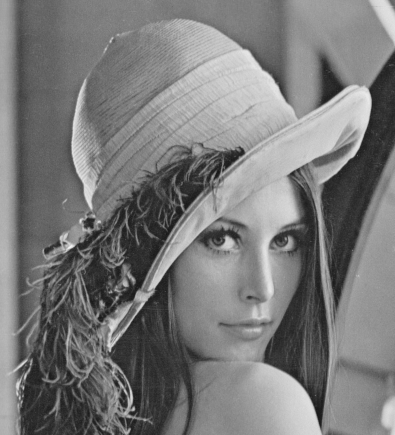

In [13]:
A,S=compression(T,i)
A95=A.astype('uint8')
myimage95=Image.fromarray(A95)
myimage95

### On remarque que cette image a à-peu-près la même qualité que l'originale

## On refait le même travail mais cette fois sur une image couleur

#### Récupérer les pixels de l'image en couleur sous forme d’un tableau Numpy

In [14]:
imC=Image.open(r"C:\Users\pc\Desktop\lena.png")
TC=np.array(imC)

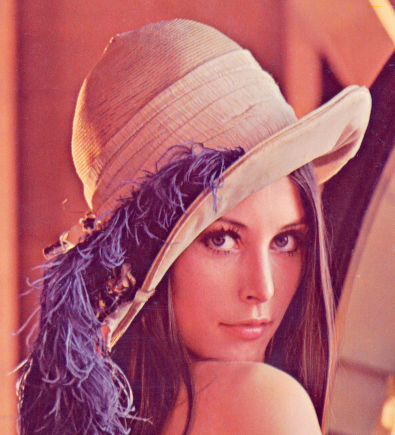

In [15]:
Image.fromarray(TC)

#### Pour traiter cette image il faut la diviser en 3 composants R,G,B

In [16]:
# Diviser le tableau en 3 sous tableau chaqu'un pour une couleur
TR = TC[:, :, 0]
TG = TC[:, :, 1]
TB = TC[:, :, 2]

#### Boucle permettant d'afficher les images obtenues pour chaque k avec le taux de compression

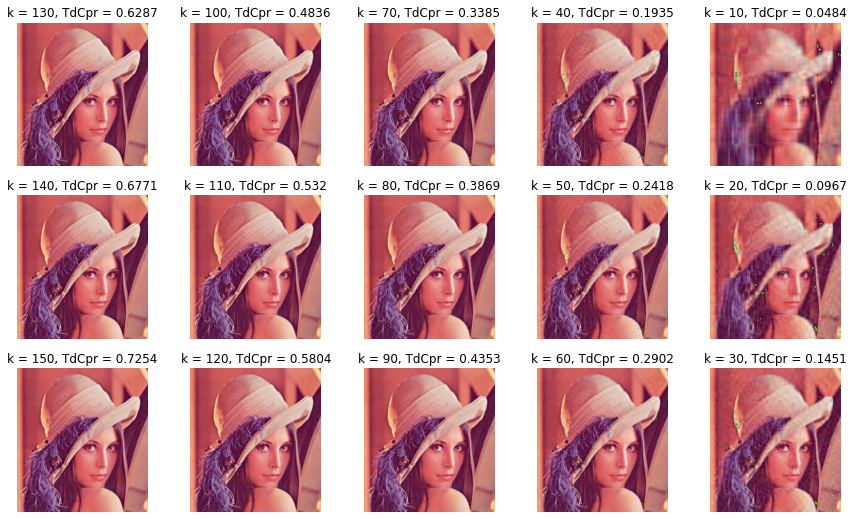

In [17]:
k ={10, 20, 30,40,50,60,70,80,90,100,110,120,130,140,150}
fig = plt.figure(figsize=(15, 9)) 
m=1
rows = 3
columns = 5
for i in k:
    # Compression de chaque tableau de couleur
    AR,SR=compression(TR,i)
    AG,SG=compression(TG,i)
    AB,SB=compression(TB,i)
    # Changer à un type conforme
    AR1=AR.astype('uint8')
    AG1=AG.astype('uint8')
    AB1=AB.astype('uint8')
    # Fusionner les 3 tableau en un seul tableau RGB
    rgbArray = np.zeros((435, 395,3), 'uint8')
    rgbArray[..., 0] = AR1
    rgbArray[..., 1] = AG1
    rgbArray[..., 2] = AB1
    # Affichage
    fig.add_subplot(rows, columns,m ) 
    m+=1
    plt.imshow(rgbArray) 
    plt.axis('off') 
    tauxcpr= i*(h+l+1)/(h*l)
    title = 'k = {0}, TdCpr = {1}'.format(i,round(tauxcpr,4))
    plt.title(title)
    #Autre methode de fusion par image:
    '''
    imr = Image.fromarray(AR1, mode=None)
    img = Image.fromarray(AG1, mode=None)
    imb = Image.fromarray(AB1, mode=None)
    newImage = Image.merge("RGB", (imr, img, imb))
    '''